# Ratings and Revenue

Is there a noticeable relationship between ratings and the top film gross revenue?


## import the data

In [1]:
#necessary imports

import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
#add pandas display options for number and column display

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)


In [3]:
#converts tsv files

tsv_file = './zippedData/rt.movie_info.tsv.gz'
convert = pd.read_table(tsv_file, delimiter='\t')
convert.to_csv('./zippedData/rt.movie_info.csv.gz')

tsv_file_r = './zippedData/rt.reviews.tsv.gz'
convert_r = pd.read_table(tsv_file_r, delimiter='\t', encoding = 'unicode_escape')
convert_r.to_csv('./zippedData/rt.reviews.csv.gz')

In [4]:
#importing data using glob

datafiles = glob("./zippedData/*.csv.gz")
datafiles

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\rt.movie_info.csv.gz',
 './zippedData\\rt.reviews.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [5]:
datafiles_dict = {}
for filename in datafiles:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".gz", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename)
    datafiles_dict[filename_cleaned] = filename_df

In [6]:
print(datafiles_dict.keys())

dict_keys(['bom_movie_gross', 'imdb_name_basics', 'imdb_title_akas', 'imdb_title_basics', 'imdb_title_crew', 'imdb_title_principals', 'rt_movie_info', 'rt_reviews', 'tmdb_movies', 'tn_movie_budgets'])


In [7]:
#load in dataset in csv to dataframe

tmdb_mglb_df = pd.read_csv('tmdb_mglb.csv')

tmdb_mglb_df.head() #call first 5 rows

,Unnamed: 0,id,original_title,popularity,release_date_x,title,vote_average,vote_count,Fantasy,Drama,War,Mystery,Comedy,Romance,Family,Music,Documentary,Animation,Western,Action,Crime,Thriller,TV Movie,Adventure,History,Science Fiction,Horror,original_language,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,domesticgross_v_production,total_net
0,0,12444,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,NaN,NaN,nan,nan,nan,nan,nan
1,1,10191,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,"Mar 26, 2010",How to Train Your Dragon,165000000.00,217581232.00,494870992.00,52581232.00,329870992.00
2,2,10138,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"May 7, 2010",Iron Man 2,170000000.00,312433331.00,621156389.00,142433331.00,451156389.00
3,3,862,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,English,"Nov 22, 1995",Toy Story,30000000.00,191796233.00,364545516.00,161796233.00,334545516.00
4,4,27205,Inception,27.92,2010-07-16,Inception,8.30,22186,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"Jul 16, 2010",Inception,160000000.00,292576195.00,835524642.00,132576195.00,675524642.00


In [8]:
tmdb_mglb_df = tmdb_mglb_df.drop(['Unnamed: 0', 'movie', 'title'], axis=1) #drop columns

## Ratings

Review user-generated review/rating aka Audience Score

### Of the films with the top 5 box office revenue, how were the ratings?

In [9]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT rating, box_office
FROM rt_reviews
JOIN rt_movie_info
USING('pid')  
ORDER BY box_office DESC;""")

pd.set_option('display.max_columns', None)
dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())
dft.head()

OperationalError: no such table: rt_reviews

**Finding**: We can see that there is not a significant with the top 5 films having the highest box office revenue.

### Is there a common genre associated with top ratings?

In [ ]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT rating, box_office, genre_action, genre_kids, genre_adventure, genre_animation, genre_classics, 
genre_comedy, genre_documentary, genre_drama, 
genre_horror, genre_international, genre_kids, 
genre_muscial, genre_mystery, genre_scifi, 
genre_spirituality, genre_sports, genre_romance,
genre_television, genre_western
FROM rt_reviews
JOIN rt_movie_info
USING('pid')  
WHERE (rating == '4/4') OR (rating == 'A') OR (rating == '10') OR (rating == '5/5') 
ORDER BY box_office DESC;""")

pd.set_option('display.max_columns', None)
dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())
dft.head()

**Finding**: Films with the highest ratings and highest box office revenue are primarily distributed within the action, adventure, comedy and drama genres.

### Popularity, Gross Profit and Net Revenue: are there any notable patterns?

***Movie Popularity metric in TMDB calculated by:***<br>
<ul><li>Number of votes for the day</li>
    <li>Number of views for the day</li>
    <li>Number of users who marked it as a "favourite" for the day</li>
    <li>Number of users who added it to their "watchlist" for the day</li>
    <li>Release date</li>
    <li>Number of total votes</li>
    <li>Previous days score</li>

In [10]:
tmdb_mglb_df.head()

,id,original_title,popularity,release_date_x,vote_average,vote_count,Fantasy,Drama,War,Mystery,Comedy,Romance,Family,Music,Documentary,Animation,Western,Action,Crime,Thriller,TV Movie,Adventure,History,Science Fiction,Horror,original_language,release_date_y,production_budget,domestic_gross,worldwide_gross,domesticgross_v_production,total_net
0,12444,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,7.70,10788,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,NaN,nan,nan,nan,nan,nan
1,10191,How to Train Your Dragon,28.73,2010-03-26,7.70,7610,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,"Mar 26, 2010",165000000.00,217581232.00,494870992.00,52581232.00,329870992.00
2,10138,Iron Man 2,28.52,2010-05-07,6.80,12368,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"May 7, 2010",170000000.00,312433331.00,621156389.00,142433331.00,451156389.00
3,862,Toy Story,28.00,1995-11-22,7.90,10174,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,English,"Nov 22, 1995",30000000.00,191796233.00,364545516.00,161796233.00,334545516.00
4,27205,Inception,27.92,2010-07-16,8.30,22186,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"Jul 16, 2010",160000000.00,292576195.00,835524642.00,132576195.00,675524642.00


In [11]:
#sort by popularity

popularity = tmdb_mglb_df.sort_values(by=['popularity'], ascending=False)

popularity.head()

,id,original_title,popularity,release_date_x,vote_average,vote_count,Fantasy,Drama,War,Mystery,Comedy,Romance,Family,Music,Documentary,Animation,Western,Action,Crime,Thriller,TV Movie,Adventure,History,Science Fiction,Horror,original_language,release_date_y,production_budget,domestic_gross,worldwide_gross,domesticgross_v_production,total_net
23887,299536,Avengers: Infinity War,80.77,2018-04-27,8.30,13948,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,"Apr 27, 2018",300000000.00,678815482.00,2048134200.00,378815482.00,1748134200.00
11050,245891,John Wick,78.12,2014-10-24,7.20,10081,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,English,"Oct 24, 2014",30000000.00,43037835.00,76235001.00,13037835.00,46235001.00
23888,324857,Spider-Man: Into the Spider-Verse,60.53,2018-12-14,8.40,4048,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,NaN,nan,nan,nan,nan,nan
11051,122917,The Hobbit: The Battle of the Five Armies,53.78,2014-12-17,7.30,8392,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,"Dec 17, 2014",250000000.00,255119788.00,945577621.00,5119788.00,695577621.00
5196,24428,The Avengers,50.29,2012-05-04,7.60,19673,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"May 4, 2012",225000000.00,623279547.00,1517935897.00,398279547.00,1292935897.00


In [12]:
#remove rows with empty values

popularity = popularity.dropna() 

In [13]:
#set new dataframe of top 25 most popular movies

popularity25 = popularity[:25]

In [15]:
popularity25.info

<bound method DataFrame.info of            id                               original_title  popularity  \
23887  299536                       Avengers: Infinity War       80.77   
11050  245891                                    John Wick       78.12   
11051  122917    The Hobbit: The Battle of the Five Armies       53.78   
5196    24428                                 The Avengers       50.29   
5197    24428                                 The Avengers       50.29   
11052  118340                      Guardians of the Galaxy       49.61   
20683  335984                            Blade Runner 2049       48.57   
23889  335984                            Blade Runner 2049       48.57   
23890  338952  Fantastic Beasts: The Crimes of Grindelwald       48.51   
20684  315635                       Spider-Man: Homecoming       46.77   
20686  263115                                        Logan       45.00   
23892  363088                         Ant-Man and the Wasp       44.73   
14211 

Plotting Popularity

In [20]:
#setting plot variables 
mov = popularity25.loc[:, 'original_title']
pop = popularity25.loc[:, 'popularity']
gross = popularity25.loc[:, 'worldwide_gross']
net = popularity25.loc[:, 'total_net']

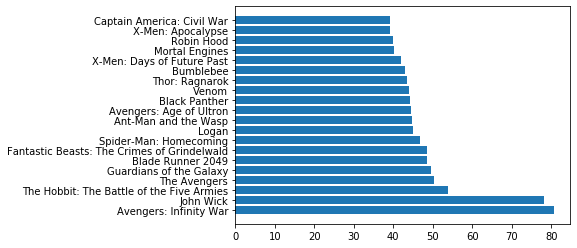

In [40]:
#plot movie vs. popularity rating

%matplotlib inline
plt.barh(movx, pop)
plt.show()

In [59]:
#calculate median of top 25 popularity score

popularity25.loc[:, 'popularity'].median()

44.383

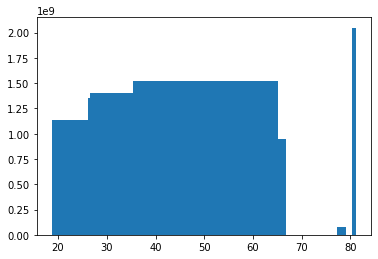

In [57]:
#popularity vs. gross

plt.bar(pop, gross)
plt.show()

In [60]:
#calculate median of gross

popularity25.loc[:, 'worldwide_gross'].median()

652220086.0

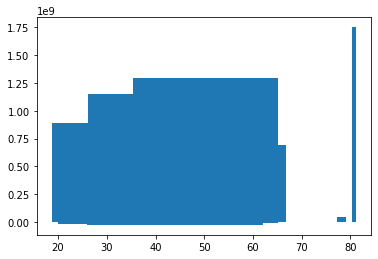

In [58]:
#popularity vs. net

plt.bar(pop, net)
plt.show()

In [61]:
popularity25.loc[:, 'total_net'].median()

493144660.0

**Finding**: Of the Top 25 movies with the highest popularity rating, an average rating of 44.383 correlated to a gross revenue of $652,220,086 and net profits of $493,144,660, respectively.
    

## Data Visualizations 

line graph of what gross profit looks like considering popularity. (popularity is the Y axis and dollars is the X axis)